### Assessing suitable days: rainless days

In [1]:
import matplotlib
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
import csv
import bisect
import datetime
from scipy import interpolate
from matplotlib.dates import DateFormatter

# User defined functions
from load_weather_data_from_csv import *

### Remarks:
- __HSLU pyranometer data__ is avaiable from 2017 01.01 to 2018 01.03<br>
- __Images from sky-cameras__ range from 2017 11.17 to 2018 11.13<br>


- __Camera 1__ worked from 2017 02.11 to 2018 11.13<br>
    - SW version 1 from 2017 01.01 to 2018 04.02
    - SW version 2 from 2018 04.03 to 2018 10.08
    - SW version 3 from 2018 10.09 to 2018 11.13
    
    
- __Camera 2__ worked from 2017 02.11 to 2018 11.13<br>
    - SW version 1 from 2018 01.09 to 2018 04.03
    - SW version 2 from 2018 04.03 to 2018 06.10
    - SW version 3 from 2018 11.12 to 2018 11.14

#### Import Precipitation

In [2]:
luz_precip = r'../weather_data/precipitation_luz_2017_2018.csv'

df_precip = process_LUZ_Precip(luz_precip)
df_precip.set_index(df_precip.datetime, inplace=True)
s_precip = df_precip['rka150d0']       # daily precipitaion in mm 

#df_precip.head(n=2)

#### Import sunshine duration, relative to the absolute possible daily sum

In [3]:
dur_csv = r'../weather_data/sunshine_duration_2017_2018.csv'

df_rel_insol = process_LUZ_dur(dur_csv)
df_rel_insol.set_index(df_rel_insol.datetime, inplace=True)
df_rel_insol['sremaxdv'] = pd.to_numeric(df_rel_insol['sremaxdv'], errors='coerce')
s_rel_insol = df_rel_insol['sremaxdv']          # in percent

#### Import wind data: max wind gust [m/s]; daily mean wind speed [km/h]; wind direction [°]

In [4]:
dur_csv = r'../weather_data/wind_speed_luz_2017_2018.csv'

df_wind_data = process_LUZ_wind_data(dur_csv)
df_wind_data.set_index(df_wind_data.datetime, inplace=True)
s_gust           = df_wind_data['fkl010d1']          # Windboeen  in [m/s]
s_wind_speed     = df_wind_data['fu3010d0']          # Wind speed in [km/h]
s_wind_direction = df_wind_data['dkl010d0']          # Wind direction in [°]

#### Plot wind data

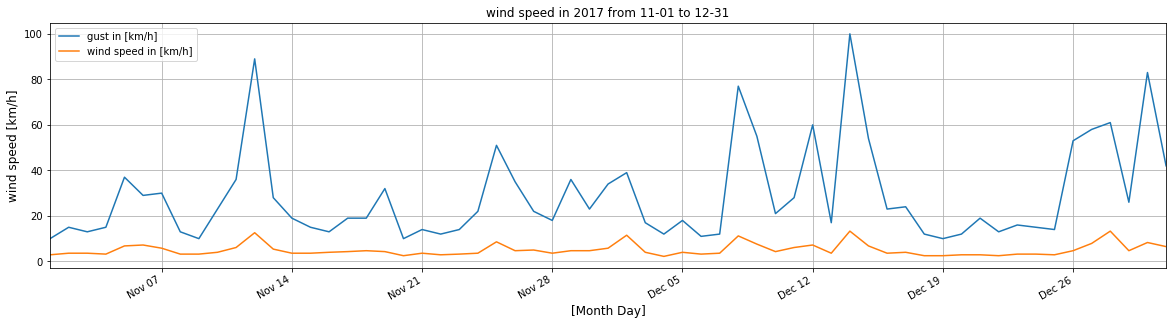

In [5]:
year  = '2017-'   
s_day = '11-01' # beginning of observation
e_day = '12-31' # end of observation
start = year + s_day
end   = year + e_day

s_wind_speed_17 = s_wind_speed.loc[start:end]
s_gust_17       = s_gust.loc[start:end]
s_gust_17       =((s_gust_17 * 3600) /1000).round().astype(int)

fig, ax = plt.subplots(figsize=(20,5))
s_gust_17.plot(label='gust in [km/h]')
s_wind_speed_17.plot(label='wind speed in [km/h]')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('wind speed [km/h]', fontsize=12)
ax.set_title('wind speed in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Precipitation and overlayed insolination 2017 from 11-01 to 12-31 near Lucern at Long: 8°18' Lat: 47°02'  

min wind speed: 2.2
max wind speed: 13.3


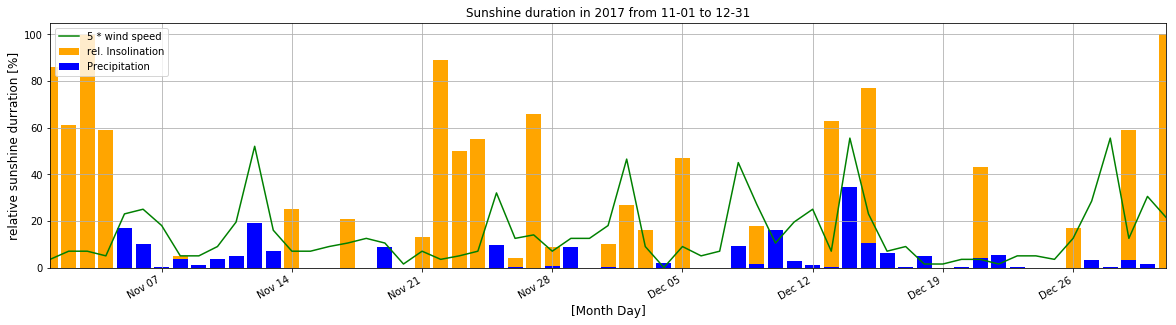

In [6]:
year  = '2017-'   
s_day = '11-01' # beginning of observation
e_day = '12-31' # end of observation
start = year + s_day
end   = year + e_day

s_precip_17 = s_precip.loc[start:end]
s_rel_insol_17 = s_rel_insol.loc[start:end]
s_wind_sp = s_wind_speed.loc[start:end]
s_wind_speed_17 = 5*(s_wind_sp - s_wind_sp.min())
print('min wind speed: {}'.format(s_wind_sp.min()))
print('max wind speed: {}'.format(s_wind_sp.max()))


fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_insol_17.index, s_rel_insol_17.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_17.index, s_precip_17.values, label='Precipitation', color= 'blue')
s_wind_speed_17.plot(label='5 * wind speed',color= 'green')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Insolination and overlayed precipitation in 2017: 9.30 - 10.31

min wind speed: 2.2
max wind speed: 13.3


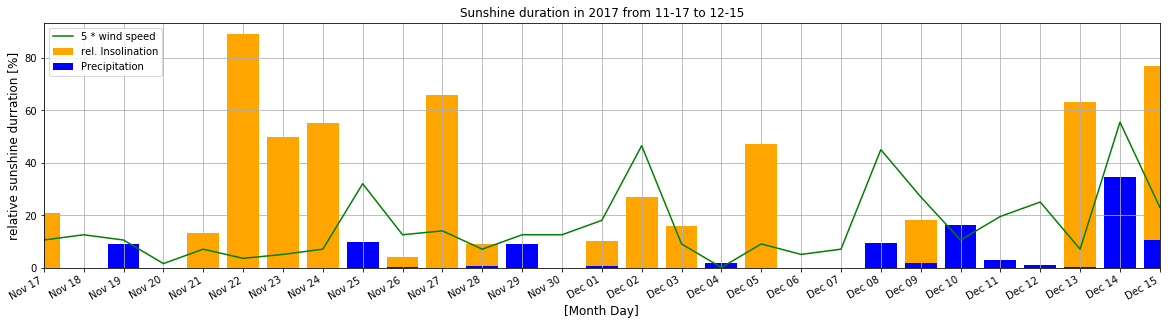

In [7]:
year  = '2017-'   
s_day = '11-17' # beginning of observation
e_day = '12-15' # end of observation
start = year + s_day
end   = year + e_day

s_precip_17 = s_precip.loc[start:end]
s_rel_insol_17 = s_rel_insol.loc[start:end]
s_wind_sp = s_wind_speed.loc[start:end]
s_wind_speed_17 = 5*(s_wind_sp - s_wind_sp.min())
print('min wind speed: {}'.format(s_wind_sp.min()))
print('max wind speed: {}'.format(s_wind_sp.max()))

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_insol_17.index, s_rel_insol_17.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_17.index, s_precip_17.values, label='Precipitation', color= 'blue')
s_wind_speed_17.plot(label='5 * wind speed',color= 'green')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Detail view 2018 January to March 
Remark: Time span where pyranometer data from HSLU is avaiable in 2018: from 1.01 to 3.01

min wind speed: 2.5
max wind speed: 23.8


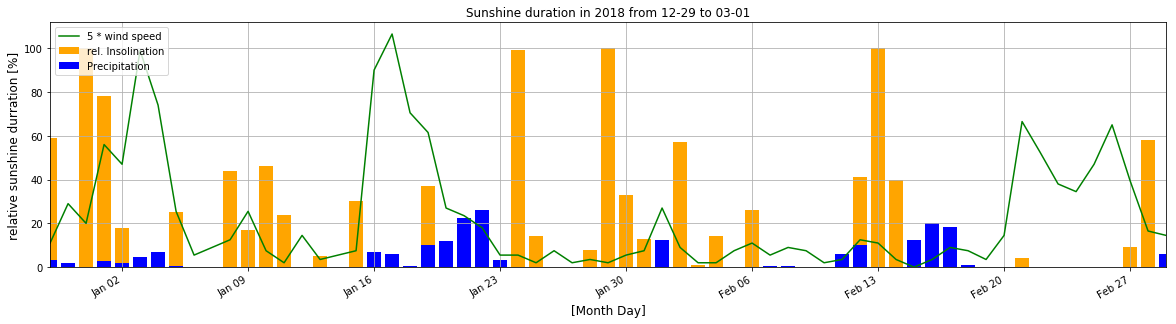

In [8]:
year1  = '2017-'   
year2  = '2018-'   
s_day = '12-29' # beginning of observation
e_day = '03-01' # end of observation
start = year1 + s_day
end   = year2 + e_day

s_precip_3 = s_precip.loc[start:end]
s_rel_insol_3 = s_rel_insol.loc[start:end]
s_wind_sp = s_wind_speed.loc[start:end]
s_wind_speed_3 = 5*(s_wind_sp - s_wind_sp.min())
print('min wind speed: {}'.format(s_wind_sp.min()))
print('max wind speed: {}'.format(s_wind_sp.max()))

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_insol_3.index, s_rel_insol_3.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_3.index, s_precip_3.values, label='Precipitation', color= 'blue')
s_wind_speed_3.plot(label='5 * wind speed',color= 'green')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year2.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Detail view 2018 April to May

min wind speed: 3.6
max wind speed: 14.4


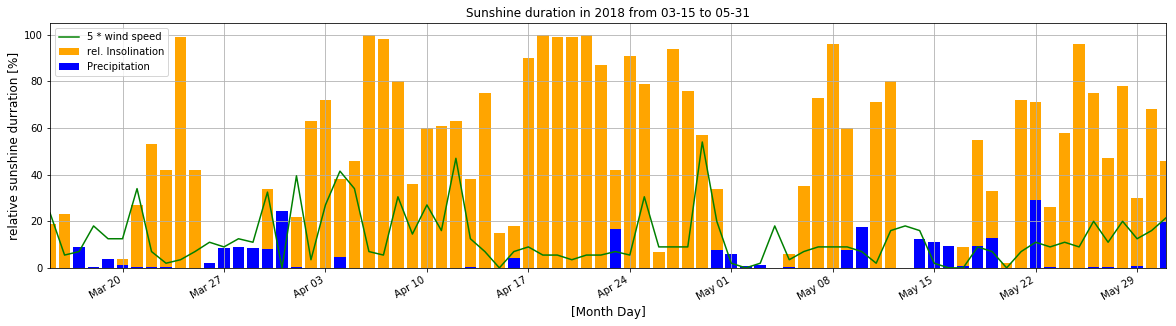

In [9]:
year  = '2018-'   
s_day = '03-15' # beginning of observation
e_day = '05-31' # end of observation
start = year + s_day
end   = year + e_day

s_precip_4 = s_precip.loc[start:end]
s_rel_4 = s_rel_insol.loc[start:end]
s_wind_sp = s_wind_speed.loc[start:end]
s_wind_speed_4 = 5*(s_wind_sp - s_wind_sp.min())
print('min wind speed: {}'.format(s_wind_sp.min()))
print('max wind speed: {}'.format(s_wind_sp.max()))

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_4.index, s_rel_4.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_4.index, s_precip_4.values, label='Precipitation', color= 'blue')
s_wind_speed_4.plot(label='5 * wind speed',color= 'green')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Detail view 2018 Jun to July

min wind speed: 4.0
max wind speed: 14.8


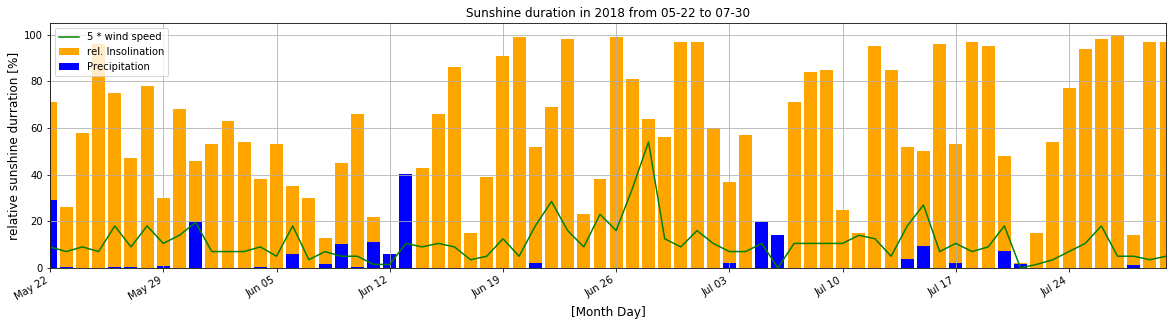

In [10]:
year  = '2018-'   
s_day = '05-22' # beginning of observation
e_day = '07-30' # end of observation
start = year + s_day
end   = year + e_day

s_precip_5 = s_precip.loc[start:end]
s_rel_5 = s_rel_insol.loc[start:end]
s_wind_sp = s_wind_speed.loc[start:end]
s_wind_speed_5 = 5*(s_wind_sp - s_wind_sp.min())
print('min wind speed: {}'.format(s_wind_sp.min()))
print('max wind speed: {}'.format(s_wind_sp.max()))

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_5.index, s_rel_5.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_5.index, s_precip_5.values, label='Precipitation', color= 'blue')
s_wind_speed_5.plot(label='5 * wind speed',color= 'green')
#plt.axhline(y=s_wind_base, color='g', linestyle='-')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Detail view 2018 August to September

min wind speed: 3.6
max wind speed: 10.4


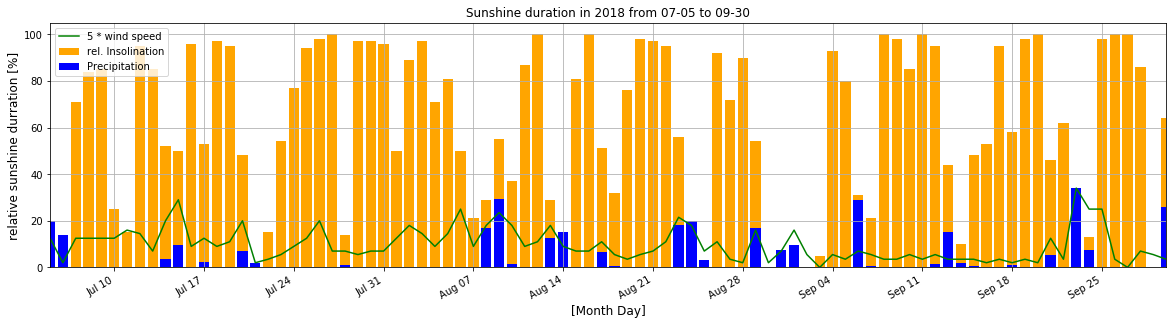

In [11]:
year  = '2018-'   
s_day = '07-05' # beginning of observation
e_day = '09-30' # end of observation
start = year + s_day
end   = year + e_day

s_precip_6 = s_precip.loc[start:end]
s_rel_6 = s_rel_insol.loc[start:end]
s_wind_sp = s_wind_speed.loc[start:end]
s_wind_speed_6 = 5*(s_wind_sp - s_wind_sp.min())
print('min wind speed: {}'.format(s_wind_sp.min()))
print('max wind speed: {}'.format(s_wind_sp.max()))

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_6.index, s_rel_6.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_6.index, s_precip_6.values, label='Precipitation', color= 'blue')
s_wind_speed_6.plot(label='5 * wind speed',color= 'green')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Detail view 2018 October 

min wind speed: 2.9
max wind speed: 8.6


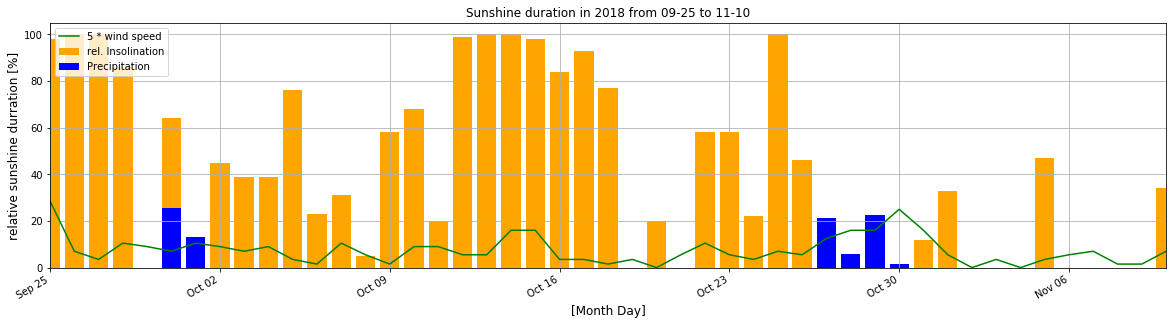

In [12]:
year  = '2018-'   
s_day = '09-25' # beginning of observation
e_day = '11-10' # end of observation
start = year + s_day
end   = year + e_day

s_precip_7 = s_precip.loc[start:end]
s_rel_7 = s_rel_insol.loc[start:end]
s_wind_sp = s_wind_speed.loc[start:end]
s_wind_speed_7 = 5*(s_wind_sp - s_wind_sp.min())
print('min wind speed: {}'.format(s_wind_sp.min()))
print('max wind speed: {}'.format(s_wind_sp.max()))

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_7.index, s_rel_7.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_7.index, s_precip_7.values, label='Precipitation', color= 'blue')
s_wind_speed_7.plot(label='5 * wind speed',color= 'green')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

### Longest dry periodes in 2018
21.06.2018 - 03.07.2018 -> 11 days<br>
28.07.2018 - 08.08.2018 -> 11 days<br>
10.02.2018 - 27.10.2018 -> 25 days<br>
